<a href="https://colab.research.google.com/github/nsiatoya/Inicio/blob/main/SiatoyaJose_EA1U3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

José Nelson Siatoya Villalobos
Unidad 3. Evidencia de aprendizaje 1. Pronóstico de tratamiento para paciente con cáncer de mama
03-dic-2021
Asesor: Julián Dario Giraldo

In [ ]:
pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sw
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing  import OrdinalEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_excel("/breast_cancer.xlsx")
df

,Class,age,menopause,tumor_size,inv_node,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
df.age.unique()
df.menopause.unique()
df.tumor_size.unique()
df.Class.unique()
df.inv_node.unique()
df.breast_quad.unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

1.Realiza un análisis a partir de los 286 datos registrados, que permita modelar su comportamiento a partir de la variable Irradiat, el cual registra si una paciente ha sido sometida a irradiación como parte del tratamiento.

In [ ]:
carac = sw.analyze(df)      #carac es cacterización de los datos
carac.show_html('Breast_cancer_analysis')

                                             |          | [  0%]   00:00 -> (? left)

Report Breast_cancer_analysis was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df_tarea = df[['age','menopause','tumor_size','irradiat']]
#df_tarea

In [ ]:
codificador = OrdinalEncoder(categories=[['recurrence-events', 'no-recurrence-events']])  #creamos las categorías en el orden correcto
codificador.fit(df[['Class']]) #aplicamos fit o ajuste sobre los datos codificados
df['Code_Class'] = codificador.transform(df[['Class']])  #al dataframe le agrego una nueva columna llamada Code_Age con el código ordinal generado
#df['Code_Class']

In [ ]:
codificador = OrdinalEncoder(categories=[['20-29','30-39',  #coge cada campo igual y lo convierte a un número 20-29 es 1.0 y asi sucesiv..
                                          '40-49','50-59', 
                                          '60-69','70-79']])  #creamos las categorías en el orden correcto
codificador.fit(df[['age']]) #aplicamos fit sobre los datos codificados
df['Code_Age'] = codificador.transform(df[['age']])  #al dataframe le agrego una nueva columna llamada Code_Age con el código ordinal generado
#df['Code_Age']

In [ ]:
codificador = OrdinalEncoder(categories=[['premeno', 'ge40', 'lt40']]) 
codificador.fit(df[['menopause']]) 
df['Code_Meno'] = codificador.transform(df[['menopause']])  

In [ ]:
codificador = OrdinalEncoder(categories=[['0-4','5-9','10-14','15-19','20-24',
                                          '25-29','30-34','35-39','40-44','45-49','50-54']])  
df['Code_Size'] = codificador.transform(df[['tumor_size']])  

In [ ]:
codificador = OrdinalEncoder(categories=[['0-2','3-5','6-8','9-11','12-14','15-17','24-26']])  
codificador.fit(df[['inv_node']]) 
df['Code_Inv_Node'] = codificador.transform(df[['inv_node']])  

In [ ]:
codificador = OrdinalEncoder(categories=[['yes','no', '?']])  
codificador.fit(df[['node_caps']]) 
df['Code_Node_Caps'] = codificador.transform(df[['node_caps']])  

In [ ]:
codificador = OrdinalEncoder(categories=[['left', 'right']])  
codificador.fit(df[['breast']]) 
df['Code_Breast'] = codificador.transform(df[['breast']])  

In [ ]:
codificador = OrdinalEncoder(categories=[['left_up','left_low','central', 'right_up','right_low', '?']])  
codificador.fit(df[['breast_quad']]) 
df['Code_Breast_Quad'] = codificador.transform(df[['breast_quad']])  

La columna deg_malig no requiere codificación porque es la única numérica. Tiene valores 1,2 o 3.

In [ ]:
#ahora vamos a definir variables de prediccion y variables de respuesta
x = df[['Code_Age','Code_Meno','Code_Size']]
y = df['irradiat']
#ajustamos el modelo LDA
model = LinearDiscriminantAnalysis()
model.fit(x,y)

LinearDiscriminantAnalysis()

In [ ]:
#Definimos método de evaluación del modelo
cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=3,random_state=1)
#n_splits me dice cuantas veces voy a segmentar los datos
#n_repeats me dice cuantas veces voy a hacer la iteración
#random_state me dice el estado de aleatoriedad
#evaluamos el modelo
scores = cross_val_score(model,x, y, scoring= 'accuracy',cv = cv, n_jobs = -1)

print(np.mean(scores)) #calculo cual es la media de los puntajes obtenidos

0.7588669950738913


2.Pronostica cuál es la probabilidad de que una mujer de menos de 25 años, categorizada según la etapa menstrual (Menopause) en el grupo de menos de 40 años, y a quien se le ha identificado un tumor de 22 mm (establecer en qué rango se encuentra de la variable Tumo_Size), reciba o no irradiación. 25 años = 0; Menopausia <40=1; tumor de 22mm = 2 

In [ ]:
#ahora defino una nueva observación
new = [0,1,2]
model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype='<U3')

El resultado para new =[0,1,2] es que 'no' se aplica irradiación a esta persona.
A mi no me salió la categoría 40-49 en la columna tumor_size por lo cual el calculo de la media de mis puntales es diferente a la del profe. 

3.Ajusta el modelo utilizando, además de la variable de irradiación, las relacionadas con los datos provistos para la nueva paciente.

In [ ]:
#ahora voy a definir variables de prediccion y variables de respuesta usando todas las columnas de dataframe
x = df[['Code_Class','Code_Age','Code_Meno','Code_Size','Code_Inv_Node','Code_Node_Caps','deg_malig','Code_Breast','Code_Breast_Quad']]
y = df['irradiat']
#ajustamos el modelo LDA
model = LinearDiscriminantAnalysis()
model.fit(x,y)

LinearDiscriminantAnalysis()

In [ ]:
#Definimos método de evaluación del modelo
cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=3,random_state=1)
scores = cross_val_score(model,x, y, scoring= 'accuracy',cv = cv, n_jobs = -1)
print(np.mean(scores)) #calculo cual es la media de los puntajes obtenidos

0.7645320197044339


La media de los puntajes me da 0.7645320197044339
Construí la tabla siguiente para ver el ordinal de cada categoría:

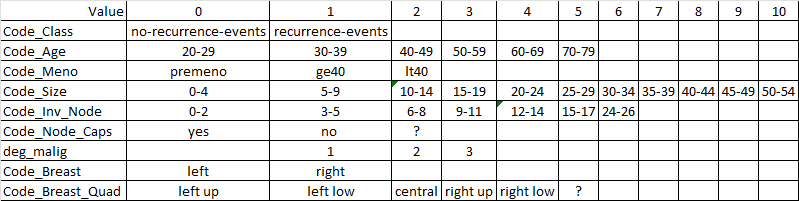

Voy a usar los datos de la fila 31 y ver si la predección se ajusta: Mujer requiere irradiación con: edad=62 años, ge40, tumor de 31mm, inv_nde =2, node_cap= no, malignidad de 2, ubicado en la parte baja del seno izquierdo

In [ ]:
#ahora defino una nueva observación con las 9 variables de predicción y la misma variable objetivo 'irradiat'
#x = df[['Code_Class','Code_Age','Code_Meno','Code_Size','Code_Inv_Node','Code_Node_Caps','deg_malig','Code_Breast','Code_Breast_Quad']]
new = [0,4,1,6,0,1,2,0,1]
model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype='<U3')

El resultado es que NO se irradia. y concide con la desición en los datos iniciales.  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
array(['no'], dtype='<U3')